In [1]:
import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
X=df.drop(columns=['Species'])
y=df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [15]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [18]:
x_train.shape

(105, 4)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [20]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100


4/4 - 1s - loss: 1.1599 - accuracy: 0.3143 - 1s/epoch - 278ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0694 - accuracy: 0.3810 - 15ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0793 - accuracy: 0.3238 - 13ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9897 - accuracy: 0.5048 - 14ms/epoch - 4ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9603 - accuracy: 0.5429 - 14ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9129 - accuracy: 0.5429 - 13ms/epoch - 3ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9062 - accuracy: 0.5429 - 14ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8695 - accuracy: 0.6667 - 14ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8157 - accuracy: 0.7429 - 13ms/epoch - 3ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7842 - accuracy: 0.7429 - 13ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.8070 - accuracy: 0.6857 - 12ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7066 - accuracy: 0.7714 - 13ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7320 - accuracy

In [25]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 4ms/step
[[9.99921560e-01 7.19542149e-05 6.44904549e-06]
 [8.00788496e-03 9.60051358e-01 3.19408141e-02]
 [9.99411702e-01 5.54771046e-04 3.36068588e-05]
 [7.60691837e-05 1.14193065e-02 9.88504589e-01]
 [9.99258578e-01 6.86081476e-04 5.52394740e-05]]


In [26]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [27]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [29]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(33.0, 0.5, 'actual')

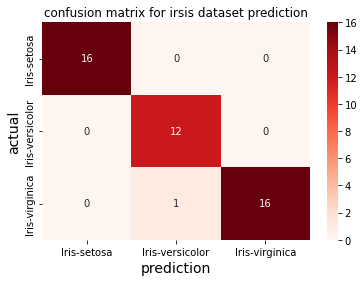

In [30]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)